## Carbon Emissions Demo

1. Updated: 4/22/2020
2. Updated: 9/23/2020, website version improvements
2. Owner: Victoria Hunt

In [12]:
from postreise.analyze.generation import emissions
from powersimdata.scenario.scenario import Scenario
from postreise.plot import plot_carbon_map, plot_carbon_bar
from bokeh.io import show

In [3]:
s824 = Scenario('824') 

SCENARIO: Julia | USABase_2020_Anchor_profile_fix_1

--> State
analyze
--> Loading grid
Loading bus
Loading plant
Loading heat_rate_curve
Loading gencost_before
Loading gencost_after
Loading branch
Loading dcline
Loading sub
Loading bus2sub
--> Loading ct


In [4]:
s1177 = Scenario('1177') 

SCENARIO: Julia | USA2030Ambitious_Composite_OB2_1

--> State
analyze
--> Loading grid
Loading bus
Loading plant
Loading heat_rate_curve
Loading gencost_before
Loading gencost_after
Loading branch
Loading dcline
Loading sub
Loading bus2sub
--> Loading ct


In [5]:
grid824 = s824.state.get_grid()
grid1177 = s1177.state.get_grid()

In [7]:
carbon824_by_bus = emissions.summarize_emissions_by_bus(emissions.generate_emissions_stats(s824), grid824.plant)

--> Loading PG


In [6]:
carbon1177_by_bus = emissions.summarize_emissions_by_bus(emissions.generate_emissions_stats(s1177), grid1177.plant)

--> Loading PG


In [10]:
busmap824 = plot_carbon_map.combine_bus_info_and_emission(grid824.bus, carbon824_by_bus)
busmap1177 = plot_carbon_map.combine_bus_info_and_emission(grid1177.bus, carbon1177_by_bus)

In [13]:
carbon_824 = plot_carbon_map.map_carbon_emission(busmap824,
                                                 size_factor =1, 
                                                 web = True, 
                                                 agg = False)
show(carbon_824)

plot carbon bars on map of US states

In [15]:
carbon_bar_824 = plot_carbon_map.map_carbon_emission_bar(busmap824, 'scenario 824')
show(carbon_bar_824)

carbon comparion of multiple scenarios maps

In [16]:
compare_824_1177 = plot_carbon_map.map_carbon_emission_comparison(busmap824,  busmap1177, web = True)
show(compare_824_1177)

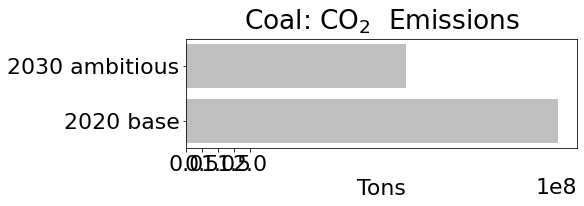

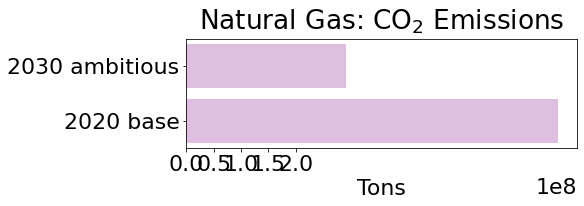

In [17]:
plot_carbon_bar.plot_carbon_bar(carbon824_by_bus, carbon1177_by_bus, '2020 base', '2030 ambitious')


In [18]:
plot_carbon_bar.print_carbon_diff(carbon824_by_bus, carbon1177_by_bus)

46%
